In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.simplefilter("ignore")
import joblib
import imblearn

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
pd.set_option('display.max_columns', 100)

target = df['y'] features = df.drop('y', axis=1) train_y, test_y, train_x, test_x = train_test_split(target, features, test_size=0.2)

accuracy={} modellr = LogisticRegression() modellr.fit(train_x, train_y)

train_pred_lr = modellr.predict(train_x) test_pred_lr = modellr.predict(test_x)

print(classification_report(train_pred_lr, train_y)) print('\nAccuracy Score for Logistic Regression Model (training): ', round(accuracy_score(train_pred_lr, train_y), 2))

print(classification_report(test_pred_lr, test_y)) print('\nAccuracy Score for Logistic Regression Model (testing): ', round(accuracy_score(test_pred_lr, test_y),2))

plt.figure(figsize=(4,3)) ConfMatrix = confusion_matrix(test_y, modellr.predict(test_x)) sns.heatmap(ConfMatrix, annot=True, cmap="Pastel1_r", fmt="d", xticklabels = ['Yes', 'No'], yticklabels = ['No', 'Yes']) plt.ylabel('True label') plt.xlabel('Predicted label') plt.title("Confusion Matrix for Logistic Regression")

param_grid = {'max_depth': np.arange(3, 5), 'max_features': np.arange(3,5)} dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5) dt.fit( train_x, train_y ) round(dt.best_score_,2) dt.best_params_ dt_tree = DecisionTreeClassifier( max_depth = 3, max_features=4, criterion='gini' ) dt_tree.fit(train_x, train_y) train_pred_dt = dt_tree.predict(train_x) test_pred_dt = dt_tree.predict(test_x) print(metrics.classification_report(train_y, train_pred_dt)) print('\nAccuracy Score for Decission Tree Model(training): ', round(accuracy_score(train_pred_dt, train_y),2))

print(metrics.classification_report(test_y, test_pred_dt)) print('\nAccuracy Score for Decission Tree Model(testing): ', round(accuracy_score(test_pred_dt, test_y),2)) plt.figure(figsize=(4,3)) ConfMatrix = confusion_matrix(test_y, dt_tree.predict(test_x)) sns.heatmap(ConfMatrix,annot=True, cmap="BuGn", fmt="d", xticklabels = ['Yes', 'No'], yticklabels = ['Yes', 'No']) plt.ylabel('True label') plt.xlabel('Predicted label') plt.title("Confusion Matrix for Decission Tree")

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_depth = 10, max_features=4, n_jobs=-1) rf_clf.fit( train_x, train_y ) train_pred_RF=rf_clf.predict(train_x) test_pred_RF=rf_clf.predict(test_x) print(metrics.classification_report(train_y, train_pred_RF)) print('\nAccuracy Score for Random Forest Model(training): ', round(accuracy_score(train_pred_RF, train_y),2))

print(metrics.classification_report(test_y, test_pred_RF)) print('\nAccuracy Score for Random Forest Model(testing): ', round(accuracy_score(test_pred_RF, test_y),2)) plt.figure(figsize=(4,3)) ConfMatrix = confusion_matrix(test_y, rf_clf.predict(test_x)) sns.heatmap(ConfMatrix,annot=True, cmap="CMRmap", fmt="d", xticklabels = ['Yes', 'No'], yticklabels = ['Yes', 'No']) plt.ylabel('True label') plt.xlabel('Predicted label') plt.title("Confusion Matrix for Decission Tree")

xgb_clf = XGBClassifier() xgb_clf.fit(train_x, train_y)

train_pred_xgb=xgb_clf.predict(train_x) test_pred_xgb=xgb_clf.predict(test_x)

print(metrics.classification_report(train_y, train_pred_xgb)) print('\nAccuracy Score for model6(training): ', round(accuracy_score(train_pred_xgb, train_y),2))

print(metrics.classification_report(test_y, test_pred_xgb)) print('\nAccuracy Score for model6(testing): ', round(accuracy_score(test_pred_xgb, test_y),2))

plt.figure(figsize=(4,3)) ConfMatrix = confusion_matrix(test_y, xgb_clf.predict(test_x)) sns.heatmap(ConfMatrix,annot=True, cmap="Oranges_r", fmt="d", xticklabels = ['Yes', 'No'], yticklabels = ['Yes', 'No']) plt.ylabel('True label') plt.xlabel('Predicted label') plt.title("Confusion Matrix for Decission Tree")

In [4]:
data = pd.read_excel('df_encoded.xlsx')
data.head()

,day,num_calls,y,dur_min,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_qual_primary,education_qual_secondary,education_qual_tertiary,education_qual_unknown,call_type_cellular,call_type_telephone,call_type_unknown,mon_apr,mon_aug,mon_dec,mon_feb,mon_jan,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown,age_bin_youth,age_bin_middle_aged,age_bin_Senior_citizen
0,5,1,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,5,1,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
2,5,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,5,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
4,5,1,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0


In [5]:
X = data.drop(columns=['y'])
y = data['y']

# names of features
feature_cols = X.columns.tolist()

In [6]:
# separating out numeric features
X_num = X[['day','num_calls','dur_min']]
num_cols = X_num.columns.tolist()

In [7]:
# check class imbalance
display(data['y'].value_counts())
display(data['y'].value_counts(normalize=True))

0    39922
1     5289
Name: y, dtype: int64

0    0.883015
1    0.116985
Name: y, dtype: float64

In [8]:
def data_split(X, y, imbalance=False):
    # split data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        shuffle=True, stratify=y, random_state=42)
    
    if imbalance:
        # use SMOTE to over sample data
        from imblearn.over_sampling import SMOTE
        sm = SMOTE(random_state=42)
        X_train, y_train = sm.fit_resample(X_train, y_train.ravel())
    
    return X_train, X_test, y_train, y_test

In [9]:
def standard_scaler(X_train, X_test, numerical_cols):
    # Make copies of dataset
    X_train_std = X_train.copy()
    X_test_std = X_test.copy()
    
    # Apply standardization on numerical features only
    for i in numerical_cols:
        sc = StandardScaler().fit(X_train_std[[i]])
        X_train_std[i] = sc.transform(X_train_std[[i]])
        X_test_std[i] = sc.transform(X_test_std[[i]])
    
    return X_train_std, X_test_std

# 1. Logistic Regression

In [10]:
def logistic_regression(imbalance=False):
    # Split data  
    X_train, X_test, y_train, y_test = data_split(X, y, imbalance=imbalance)

    # Rescale data
    X_train_std, X_test_std = standard_scaler(X_train, X_test, numerical_cols=num_cols)
    
    # Instantiate model
    clf_lr = LogisticRegression(random_state=42)
    
    # Fit the model
    clf_lr.fit(X_train_std, y_train)

    # Since this is imbalanced data, accuracy will not be right metric, hence roc_auc score used for performance.
    scores = cross_val_score(clf_lr, X_train_std, y_train, scoring="roc_auc", cv=5)
    roc_auc_lr = np.mean(scores)
    
    if imbalance:
        return "Logistic Regression", "With SMOTE", roc_auc_lr
    else:
        return "Logistic Regression", "Without SMOTE", roc_auc_lr

In [11]:
model_results = []
model_results.append(logistic_regression())
model_results.append(logistic_regression(imbalance=True))

pd.DataFrame(model_results, columns=["Model","SMOTE","ROC_AUC Score"])

,Model,SMOTE,ROC_AUC Score
0,Logistic Regression,Without SMOTE,0.905991
1,Logistic Regression,With SMOTE,0.975182


### Hyperparameter Tuning

In [12]:
# Split data with SMOTE 
X_train, X_test, y_train, y_test = data_split(X, y, imbalance=True) 

# Rescale data
X_train_std, X_test_std = standard_scaler(X_train, X_test, numerical_cols=num_cols)

logistic = LogisticRegression(random_state=42)
distributions = dict(penalty=['l1','l2'])
clf = GridSearchCV(logistic, distributions)

lr_best= clf.fit(X_train_std, y_train)   

print(lr_best.best_params_)

{'penalty': 'l2'}


In [13]:
# Finding ROC_AUC score of tuned model on training data
scores_tuned = cross_val_score(lr_best, X_train_std, y_train, scoring="roc_auc", cv=5)
roc_auc_lr_best = np.mean(scores_tuned)

print(f'ROC_AUC score after tuning parameters:{roc_auc_lr_best:.3f}')

ROC_AUC score after tuning parameters:0.975


In [14]:
# scores_tuned = cross_val_score(lr_best, X_test_std, y_train, scoring="roc_auc", cv=5)
# roc_auc_lr_best = np.mean(scores_tuned)

# print(f'ROC_AUC score after tuning parameters:{roc_auc_lr_best:.3f}')
roc_auc_score(y_test.values, lr_best.predict_proba(X_test_std)[:,1])

0.8976431617857773

### Model Evaluation

In [15]:
# UDF to compute Precision, Recall and F1 score
def pre_rec_f1(model, X_test, y_test):
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2 * (precision * recall) / (precision + recall)
    
    print(f'Precision:{precision:.3f}\nRecall:{recall:.3f}\nF1 score:{F1:.3f}')

In [16]:
pre_rec_f1(lr_best, X_test_std, y_test)

Precision:0.626
Recall:0.396
F1 score:0.485


# 2. Random Forest

In [17]:
def random_forest(imbalance=False):
    # Split data  
    X_train, X_test, y_train, y_test = data_split(X, y, imbalance=imbalance)
    
    # Instantiate model
    clf_rf = RandomForestClassifier()
   
    # Fit the model
    clf_rf.fit(X_train, y_train)

    # Use model's default parameters to get cross validation score
    scores = cross_val_score(clf_rf, X_train, y_train, scoring="roc_auc", cv=5)
    roc_auc_rf = np.mean(scores)
    
    if imbalance:
        return "Random Forest", "With SMOTE", roc_auc_rf
    else:
        return "Random Forest", "Without SMOTE", roc_auc_rf

In [18]:
model_results = []
model_results.append(random_forest())
model_results.append(random_forest(imbalance=True))

pd.DataFrame(model_results, columns=["Model","SMOTE","ROC_AUC Score"])

,Model,SMOTE,ROC_AUC Score
0,Random Forest,Without SMOTE,0.915790
1,Random Forest,With SMOTE,0.991682


### Hyperparameter Tuning

In [19]:
# Split data with SMOTE
X_train_sm, X_test, y_train_sm, y_test = data_split(X, y, imbalance=True)

# Create parameter grid  
param_grid = {
    'max_depth':[60,90,110],
    'min_samples_leaf':[3,4,5],
    'min_samples_split':[8,10,12],
    'n_estimators':[100,200,300]
}

# Instantiate the model
clf_rf = RandomForestClassifier()

# Instantiate grid search model
grid_search = GridSearchCV(estimator=clf_rf, param_grid=param_grid,    
                           cv=3, n_jobs=-1, verbose=1)

# Fit grid search to the data
grid_search.fit(X_train_sm, y_train_sm)
grid_search.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'max_depth': 110,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [20]:
# Use the best parameters to fit the model
rf_best = RandomForestClassifier(**grid_search.best_params_)   
rf_best.fit(X_train_sm, y_train_sm)

scores_best = cross_val_score(rf_best, X_train_sm, y_train_sm, scoring="roc_auc", cv=5)
roc_auc_best = np.mean(scores_best)

print(f'ROC_AUC training score after tuning for Random Forest:{roc_auc_best:.3f}')

ROC_AUC training score after tuning for Random Forest:0.988


In [21]:
roc_auc_score(y_test.values, rf_best.predict_proba(X_test_std)[:,1])

0.7530676971231197

### Model Evaluation

In [ ]:
pre_rec_f1(rf_best, X_test, y_test)

Precision:0.536
Recall:0.617
F1 score:0.574


# 3. XGBoost

In [ ]:
def xgboost(imbalance=False):
    # Split data  
    X_train, X_test, y_train, y_test = data_split(X, y, imbalance=imbalance)
    
    # Instantiate model with default parameters
    clf_xgb = XGBClassifier()
    
    # Fit the model
    clf_xgb.fit(X_train, y_train)

    # Use model's default parameters to get cross validation score
    scores = cross_val_score(clf_xgb, X_train, y_train, scoring="roc_auc", cv=5)
    roc_auc_xgb = np.mean(scores)
    
    if imbalance:
        return "XGBoost", "With SMOTE", roc_auc_xgb
    else:
        return "XGBoost", "Without SMOTE", roc_auc_xgb

In [ ]:
model_results = []
model_results.append(xgboost())                  
model_results.append(xgboost(imbalance=True))    

pd.DataFrame(model_results, columns=["Model","SMOTE","ROC_AUC Score"])

,Model,SMOTE,ROC_AUC Score
0,XGBoost,Without SMOTE,0.930480
1,XGBoost,With SMOTE,0.987162


### Hyperparameter Tuning

In [ ]:
# Sampling and split data with SMOTE
X_train_sm, X_test, y_train_sm, y_test = data_split(X, y, imbalance=True)

# Number of trees
n_estimators = np.arange(200,1000,200)

# Minimum loss reduction required to make a further partition on a leaf node of the tree
# The larger gamma is, the more conservative the algorithm will be
gamma = np.arange(0.1,0.6,0.1)

# Default 0.3, range(0,1)
learning_rate = np.arange(0.1,0.6,0.1)

# Maximum number of levels in tree
max_depth = list(range(3,8,1))

# Subsample ratio of the training instances.Range(0,1)
subsample = np.arange(0.5,0.9,0.1)

# Subsample ratio of columns when constructing each tree. Range(0,1)
colsample_bytree = np.arange(0.5,0.9,0.1)

# Control the balance of positive and negative weights
# Sum(negative instances) / sum(positive instances)
scale_pos_weight = [1,3.5]


# Create the random grid
random_grid_xgb = {'n_estimators':n_estimators,
                   'gamma':gamma,
                   'learning_rate':learning_rate,
                   'max_depth':max_depth,
                   'subsample':subsample,
                   'colsample_bytree':colsample_bytree,
                   'scale_pos_weight':scale_pos_weight
                   }
print(random_grid_xgb )

{'n_estimators': array([200, 400, 600, 800]), 'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5]), 'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5]), 'max_depth': [3, 4, 5, 6, 7], 'subsample': array([0.5, 0.6, 0.7, 0.8]), 'colsample_bytree': array([0.5, 0.6, 0.7, 0.8]), 'scale_pos_weight': [1, 3.5]}


In [ ]:
xgboost = XGBClassifier()
xgb_random = RandomizedSearchCV(estimator=xgboost, 
                                param_distributions=random_grid_xgb, 
                                n_iter=100, 
                                cv=3, 
                                verbose=1, 
                                random_state=42, 
                                n_jobs=-1,
                                scoring='roc_auc')


xgb_random.fit(X_train_sm, y_train_sm)   

print(xgb_random.best_params_, xgb_random.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'subsample': 0.7, 'scale_pos_weight': 3.5, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.30000000000000004, 'colsample_bytree': 0.6} 0.9884800669054418


In [ ]:
pre_rec_f1(xgb_random, X_test, y_test)

Precision:0.476
Recall:0.778
F1 score:0.591


In [ ]:
roc_auc_score(y_test.values, xgb_random.predict_proba(X_test_std)[:,1])

0.7788682771994357

# Models Comparison

### Confusion Matrix

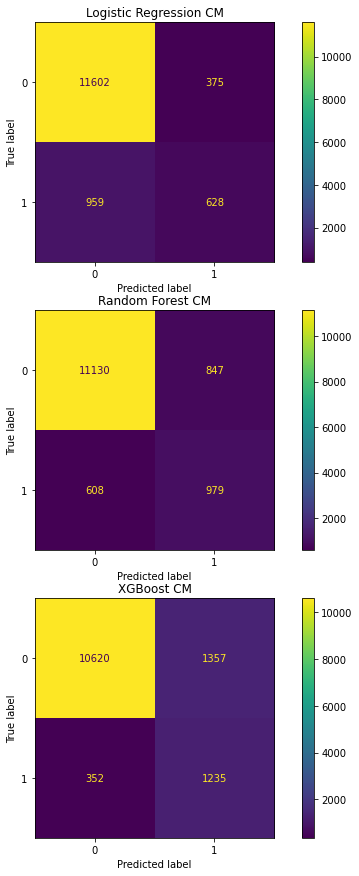

In [ ]:
# Plot confusion matrix of 3 models
fig, ax = plt.subplots(3, 1, figsize=(10,15))

plot_confusion_matrix(lr_best, X_test_std, y_test, ax=ax[0], values_format="d")
ax[0].set_title("Logistic Regression CM");

plot_confusion_matrix(rf_best, X_test, y_test, ax=ax[1], values_format="d")
ax[1].set_title("Random Forest CM");

plot_confusion_matrix(xgb_random, X_test, y_test, ax=ax[2], values_format="d")
ax[2].set_title("XGBoost CM");

### ROC_AUC Curve

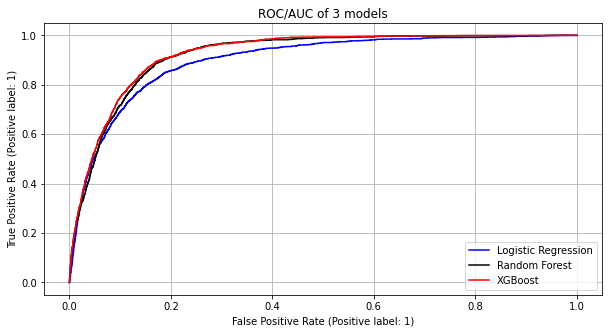

In [ ]:
# Plot ROC_AUC curve of 3 models
fig, ax = plt.subplots(figsize=(10,5))

plot_roc_curve(lr_best, X_test_std, y_test, ax=ax, color="blue", label='Logistic Regression')
plot_roc_curve(rf_best, X_test, y_test, ax=ax, color="black", label='Random Forest')
plot_roc_curve(xgb_random, X_test, y_test, ax=ax, color="red", label='XGBoost')

plt.title('ROC/AUC of 3 models')
plt.grid()

### Precision_Recall Curve

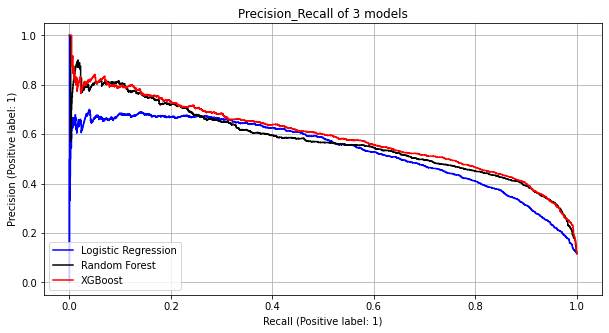

In [ ]:
# Compare 3 models' Precision_recall curves
fig, ax = plt.subplots(figsize=(10,5))

plot_precision_recall_curve(lr_best, X_test_std, y_test, ax=ax, color="blue", label='Logistic Regression')
plot_precision_recall_curve(rf_best, X_test, y_test, ax=ax, color="black", label='Random Forest')
plot_precision_recall_curve(xgb_random, X_test, y_test, ax=ax, color="red", label='XGBoost')

plt.title('Precision_Recall of 3 models')
plt.grid()

### Comparing models with Dummy Classifier

In [ ]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy='stratified')
y_pred_dummy = dummy_clf.predict(X_test)

print('Dummy model metrics:')
pre_rec_f1(dummy_clf, X_test, y_test)

Dummy model metrics:
Precision:0.113
Recall:0.490
F1 score:0.184


### Feature Importance using random forest

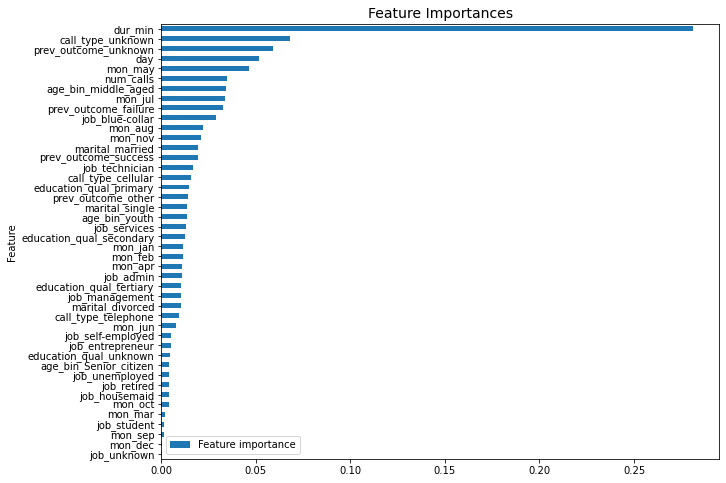

In [ ]:
# Plot feature importance of selected model - Random Forest
fea_df = pd.DataFrame({'Feature':feature_cols, 'Feature importance':rf_best.feature_importances_})
fea_df = fea_df.sort_values(by='Feature importance')

fig, ax = plt.subplots(figsize=(10,8))
fea_df.plot.barh(x='Feature', y='Feature importance', ax=ax)
plt.title('Feature Importances', fontsize=14);

In [22]:
import pickle 
pickle_out = open('rf_cls.pkl','wb')
pickle.dump(rf_best,pickle_out)
pickle_out.close()